## Import ObsPy module

In [1]:
from obspy import read
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.geodetics.base import gps2dist_azimuth


from obspy.signal.rotate import rotate_ne_rt
from obspy.signal.rotate import rotate_rt_ne
from obspy.signal.rotate import rotate2zne

import obspy as ob
print("# obspy version = ",ob.__version__)

# obspy version =  1.2.2


## Import SciPy, NumPy, matplotlib module

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl

print("# numpy version = ",np.__version__)
print("# scipy version = ",sp.__version__)
print("# matplotlib version = ",mpl.__version__)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates 


from scipy import signal
from scipy import ndimage

from scipy.fftpack import fft, ifft
from scipy.linalg import norm

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

import sys
import os


# numpy version =  1.19.1
# scipy version =  1.5.2
# matplotlib version =  3.3.1


## function: total_power_sqrt
compute sqrt(total power) for obspy stream data

In [3]:
def total_power_sqrt (st):

    st_total_power_sqrt = norm(st[0].data,2)
    
    return st_total_power_sqrt

## function: st_normalize
normalize obspy stream data

In [4]:
def st_normalize(st, val):
    st[0].data = st[0].data/val
    return st


# get EHZ data only from obspy sample data

In [5]:
st = read().select(channel="EHZ")

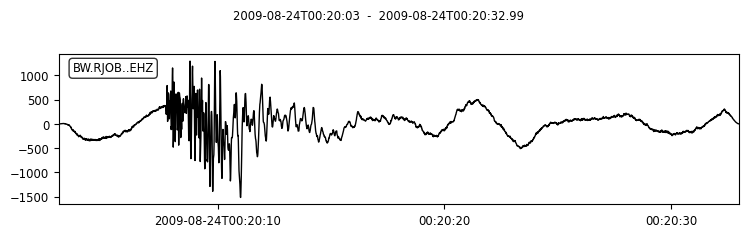

In [6]:
_plot = st.plot()

## Normalizing seismic data by total energy

In [7]:
st_total_power_sqrt  = total_power_sqrt(st)
print(st_total_power_sqrt)

15203.1977059772


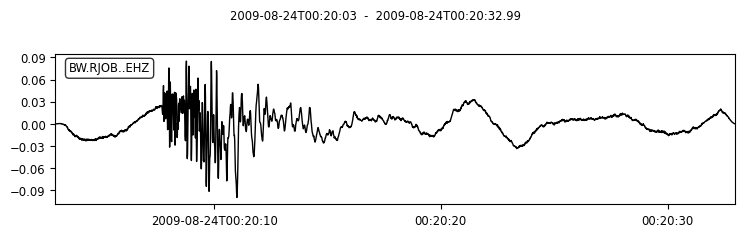

In [8]:
st_norm =  st_normalize(st.copy(), st_total_power_sqrt )
_plot = st_norm.plot()